# Classification algorithms

### Dataset description, visualisation, and pre-processing

<div class="alert alert-block alert-warning">The Heart Disease Detection dataset is composed of a set of characteristics used to determine if a patient has heart disease or not. Its main purpose is to perform classification based on the target variable, 'HeartDisease,' which indicates the presence of heart disease in the patient. This variable has integer values where 0 represents no disease and 1 indicates the presence of disease.
<div/>

<div class="alert alert-block alert-danger"> 
    
1. Import the Heart Disease Detection dataset.
2. Display and try to understand each feature in this dataset.
3. Display a summary of the dataset.
4. Verify if the dataset contains any missing values.
5. Plot the distribution of samples according to the target variable HeartDisease. Determine if the dataset is balanced.
6. Apply dummy encoding to all categorical features in the dataset.
7. Display the Pearson correlation matrix. Is there a correlation with the class and between features by considering a thresholed of 0.5?
8. Display the distribution of all features on all the scaled data (except binary features) using a histplot. What do you observe?
9. Split the data into a training and a testing set using a ratio of 0.3.
10. Normalize the data using z-score scaling.
<div/>

1. Import the Heart Disease Detection dataset.

In [3]:
import pandas as pd
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


3. Display a summary of the dataset.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


4. Verify if the dataset contains any missing values.

In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

5. Plot the distribution of samples according to the target variable HeartDisease. Determine if the dataset is balanced.

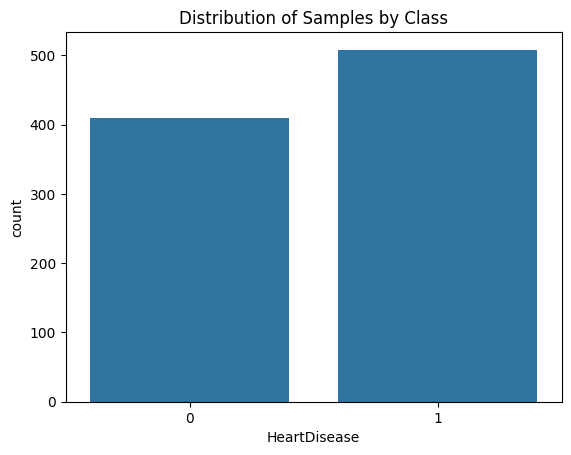

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Samples by Class')
plt.show()

6. Apply dummy encoding to all categorical features in the dataset.

In [7]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


7. Display the Pearson correlation matrix. Is there a correlation with the class and between features by considering a thresholed of 0.5?

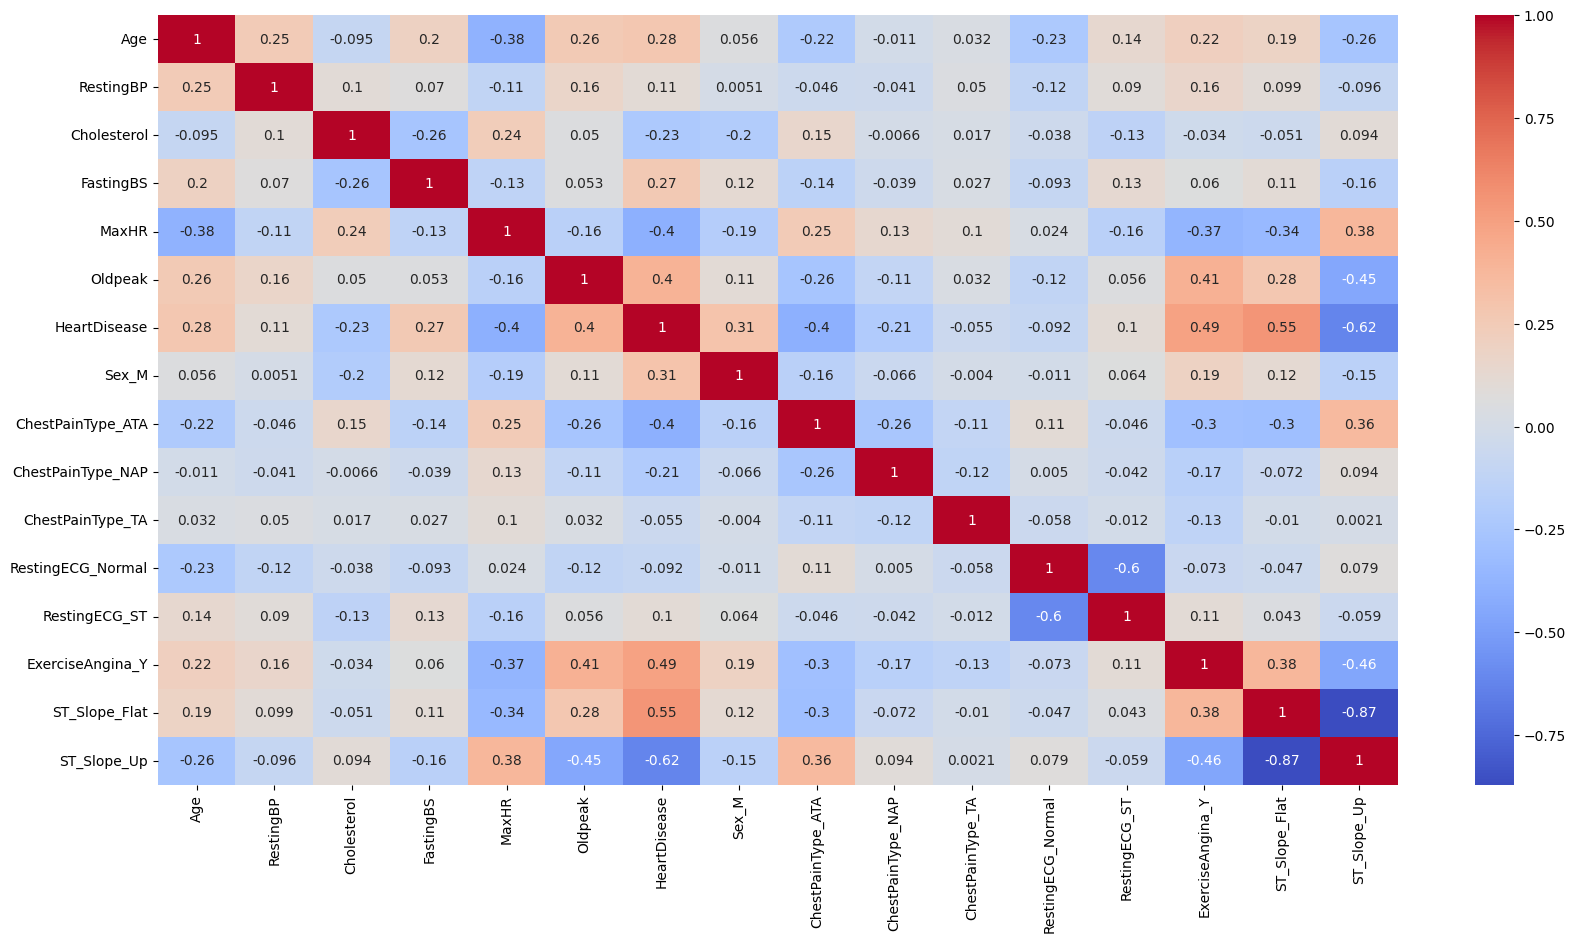

In [8]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [9]:
high_corr_features = correlation_matrix['HeartDisease'][abs(correlation_matrix['HeartDisease']) >= 0.5]
print(high_corr_features)

HeartDisease     1.000000
ST_Slope_Flat    0.554134
ST_Slope_Up     -0.622164
Name: HeartDisease, dtype: float64


8. Display the distribution of all features on all the scaled data (except binary features) using a histplot. What do you observe?

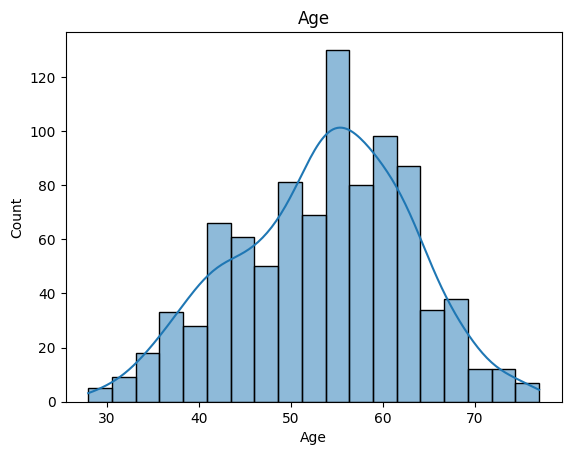

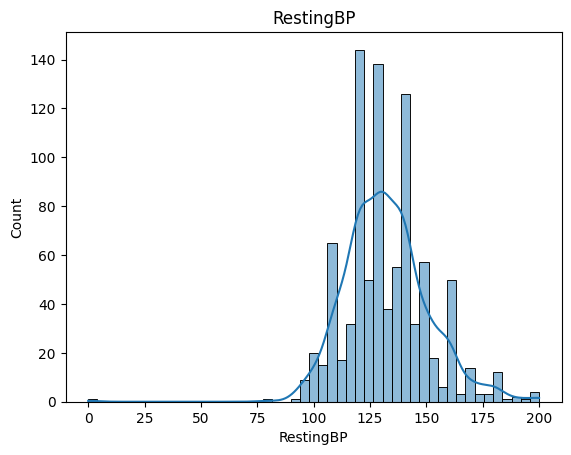

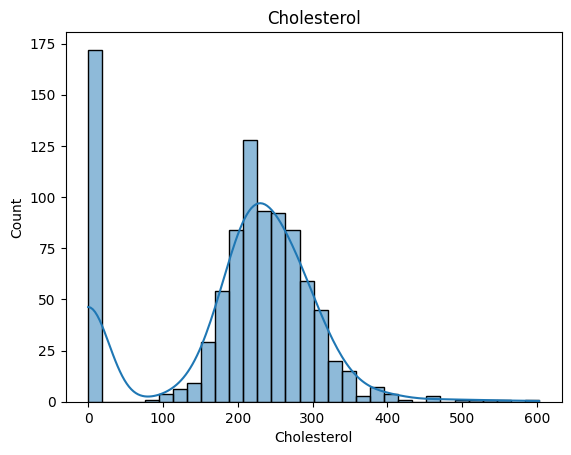

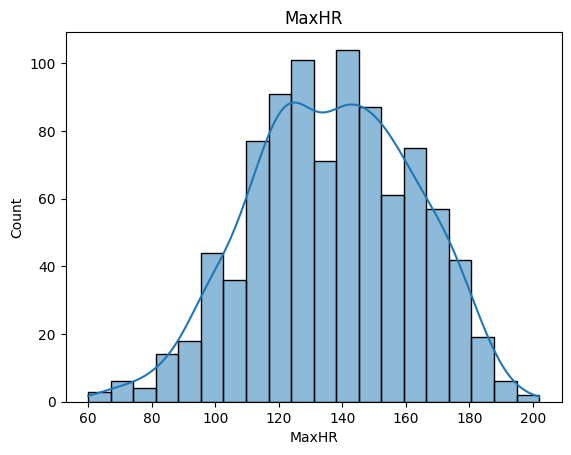

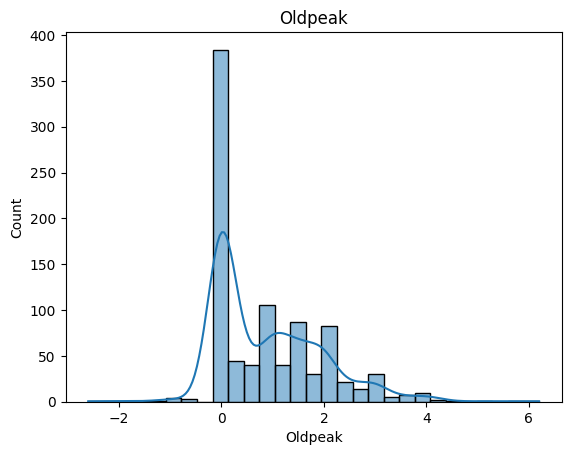

In [10]:
numeric_features = df_encoded.select_dtypes(include=['float64', 'int64']).columns
for feature in numeric_features:
    if len(df_encoded[feature].unique()) > 2:
        sns.histplot(df_encoded[feature], kde=True)
        plt.title(feature)
        plt.show()


9. Split the data into a training and a testing set using a ratio of 0.3.

In [11]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('HeartDisease', axis=1)  
y = df_encoded['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

10. Normalize the data using z-score scaling.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Data training and performance evaluation

<div class="alert alert-block alert-danger"> 
    
1. Train the following algorithms on the generated training dataset: Gaussian Naive Bayes, KNN(K=3), and decision tree (max_depth=6).
2. Display and save the tree generated by the decision tree algorithm.
3. Implement the SVM algorithm from scratch and apply it to the dataset.
4. Print the classification reports and confusion matrices of all models on the testing set. Discuss the obtained results.
5. Display the ROC curves of the generated models in one plot.
6. Which evaluation metric do you recommend for this dataset?
7. Predict the class of the third sample from the testing set based on the best-performing model.
8. Perform the cross-validation evaluation method on the best model based on the selected metric.
</div>

## 1. Algorithms & classification reports & confusion matrices


### Gaussian Naive Bayes:

In [13]:
# Gaussian Naive Bayes:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_NB = gnb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_NB)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8768115942028986


- classification report

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

print("GaussianNB Report:")
print(classification_report(y_test, y_pred_NB))

GaussianNB Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



- confusion matrix

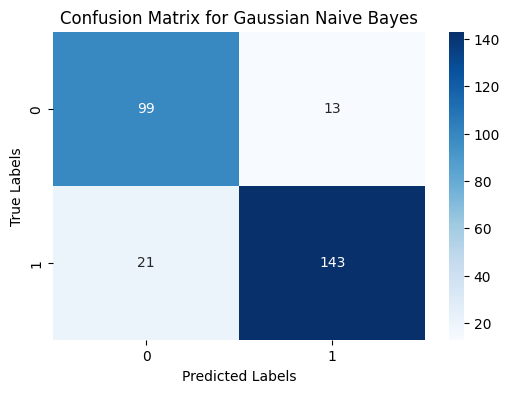

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plot_confusion_matrix(y_test, y_pred_NB, "Gaussian Naive Bayes")

### K-Nearest Neighbors (KNN, K=3)

In [16]:
# K-Nearest Neighbors (KNN, K=3):
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train) 
y_pred_knn = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8586956521739131


- classification report

In [17]:
print("KNN Report:")
print(classification_report(y_test, y_pred_knn))

KNN Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       112
           1       0.92      0.84      0.88       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276



- confusion matrix

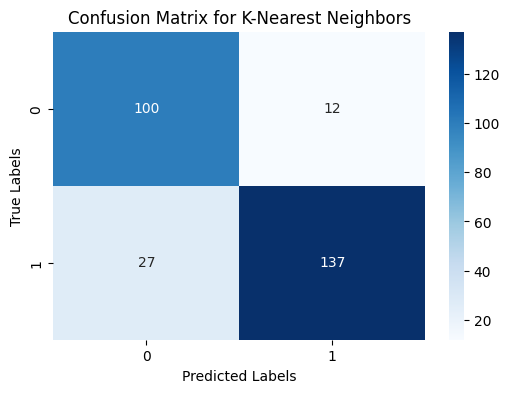

In [18]:
plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")

### decision tree (max_depth=6):

In [19]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(max_depth=6, random_state=42)
DT_model.fit(X_train_scaled, y_train)
y_pred_DT = DT_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_DT)
print(f'Accuracy: {accuracy}')

Accuracy: 0.822463768115942


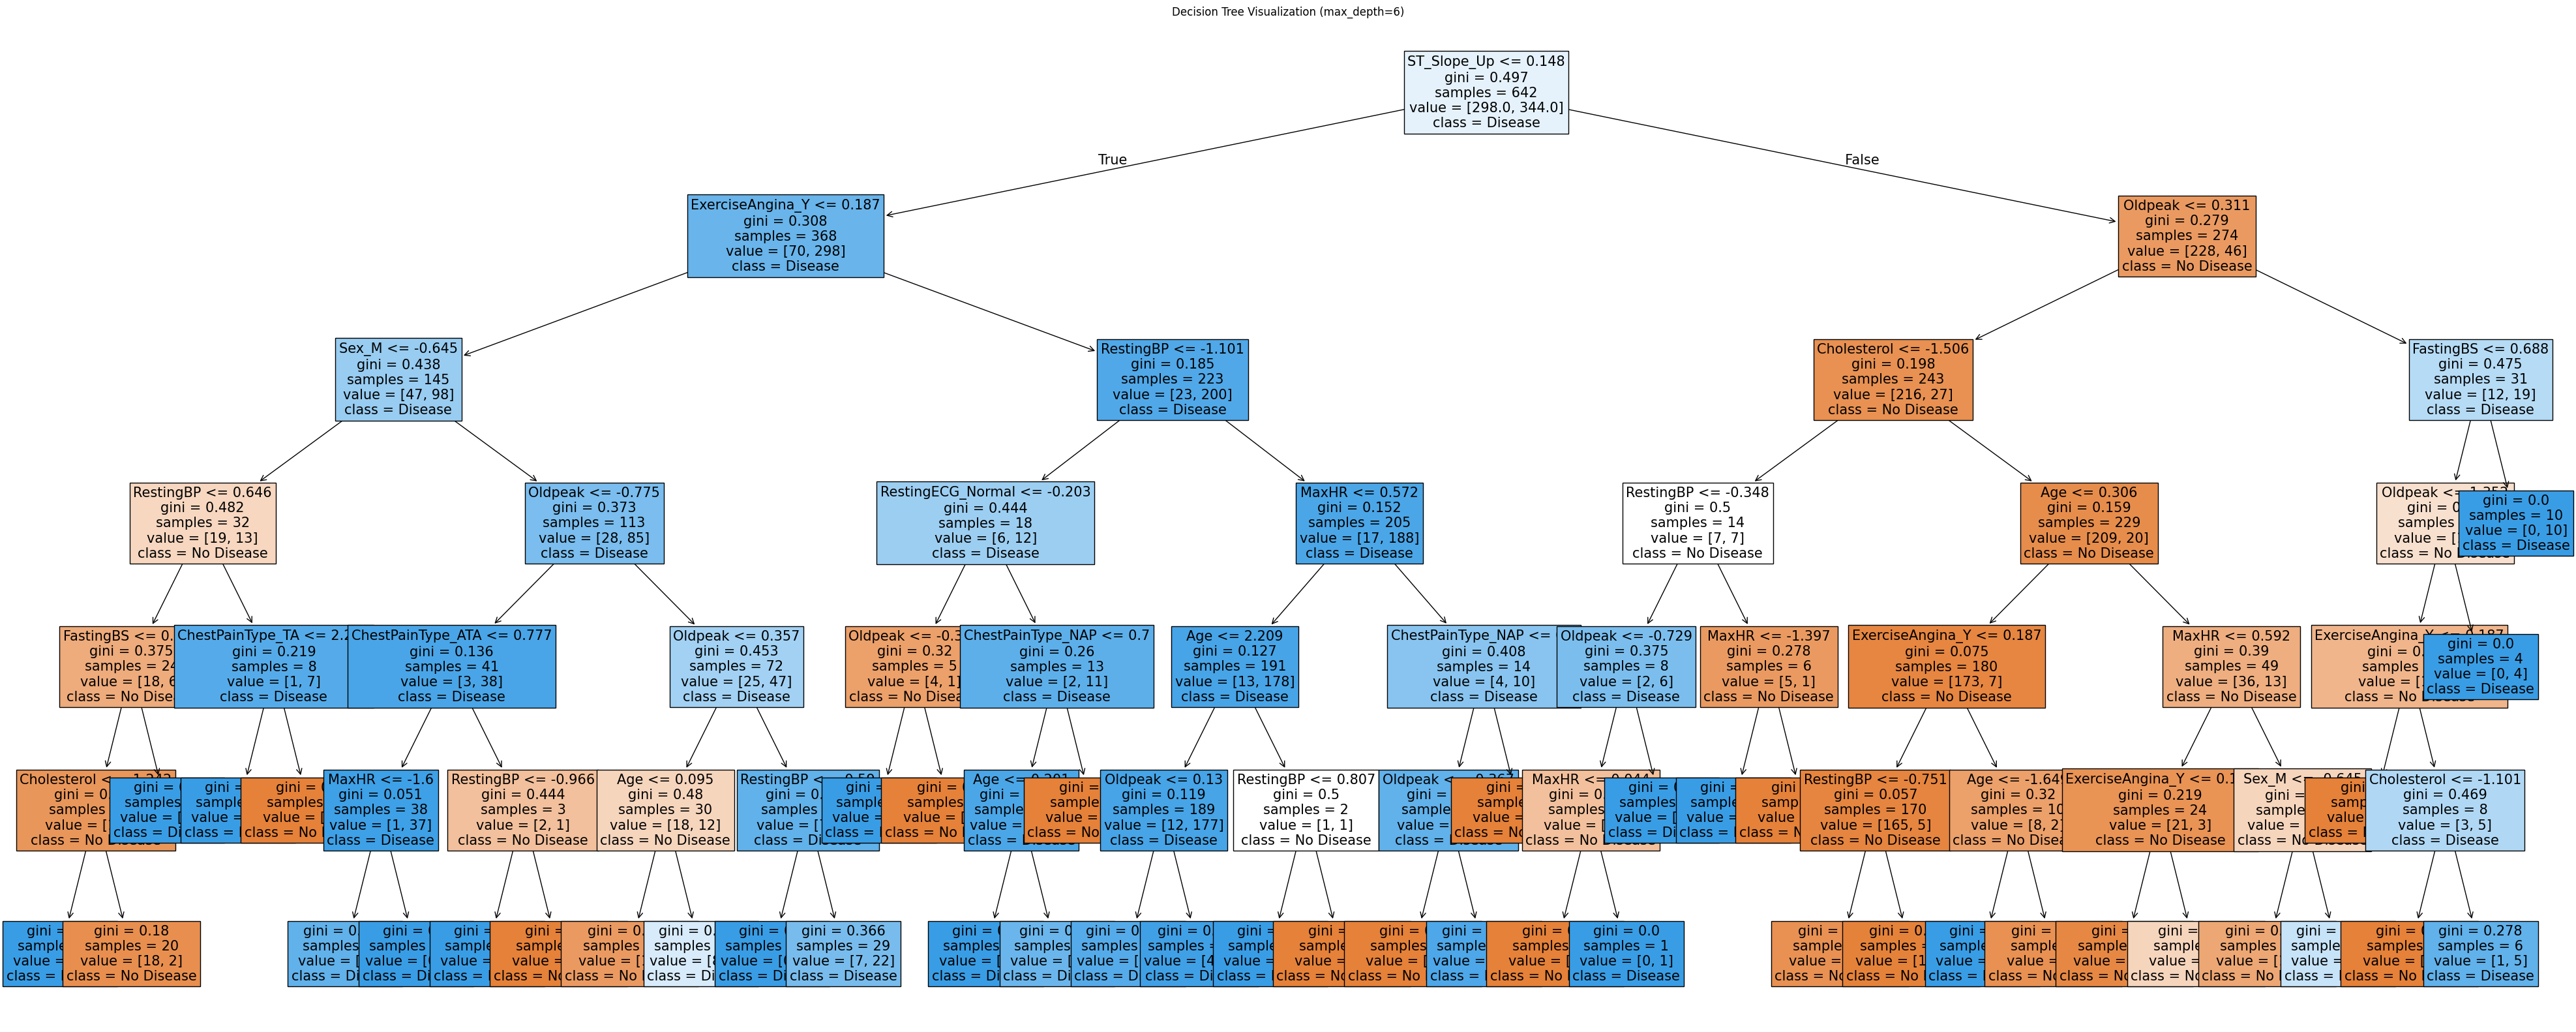

In [20]:
# Display the decision tree

from sklearn.tree import DecisionTreeClassifier, plot_tree
feature_names = X_train.columns.tolist()
plt.figure(figsize=(50, 20))  
plot_tree(DT_model, feature_names=feature_names, class_names=['No Disease', 'Disease'], filled=True,fontsize=15)
plt.title("Decision Tree Visualization (max_depth=6)")
plt.show()



- classification report

In [21]:
print("Decision tree Report:")
print(classification_report(y_test, y_pred_DT))

Decision tree Report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       112
           1       0.89      0.80      0.84       164

    accuracy                           0.82       276
   macro avg       0.82      0.83      0.82       276
weighted avg       0.83      0.82      0.82       276



- confusion matrix

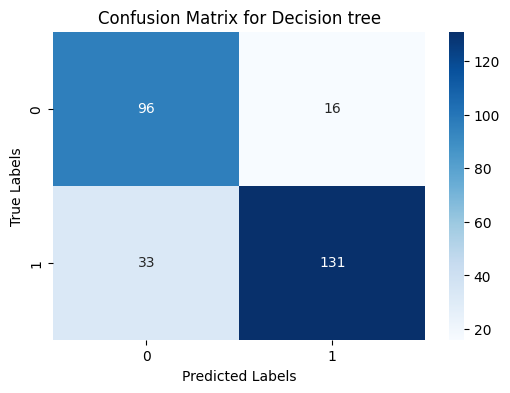

In [22]:
plot_confusion_matrix(y_test, y_pred_DT, "Decision tree")

## 3. Implement the SVM algorithm from scratch and apply it to the dataset.


In [25]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000, C=1.0):
        self.lr = learning_rate  
        self.lambda_param = lambda_param  
        self.n_iters = n_iters  
        self.w = None  
        self.b = None  
        self.C = C     

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) < 1
                if condition:  # Misclassified 
                    self.w -= self.lr * (self.lambda_param * self.w - self.C * y[idx] * x_i)
                    self.b += self.lr * self.C * y[idx]
                else:  # Correctly classified and beyond margin
                    self.w -= self.lr * self.lambda_param * self.w

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)  # Return -1 or 1


In [26]:
y_train_svm = np.where(y_train == 0, -1, 1) #y should be -1 or 1
svm = SVM()
svm.fit(X_train_scaled,y_train_svm )

In [27]:
y_pred_mysvm = svm.predict(X_test_scaled)
y_pred_mysvm = np.where(y_pred_mysvm == -1, 0, 1)

accuracy = accuracy_score(y_test, y_pred_mysvm)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8695652173913043


In [55]:
# To compare with the predefined function
from sklearn.svm import SVC  
svm = SVC(kernel='linear', C=1.0)  
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8731884057971014


- classification report

In [30]:
print("SVM Report:")
print(classification_report(y_test, y_pred_svm))

SVM Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       112
           1       0.92      0.86      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.87      0.87       276



- confusion matrix

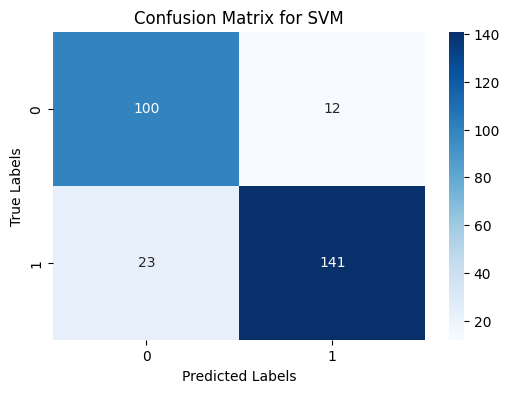

In [31]:
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

5. Display the ROC curves of the generated models in one plot.


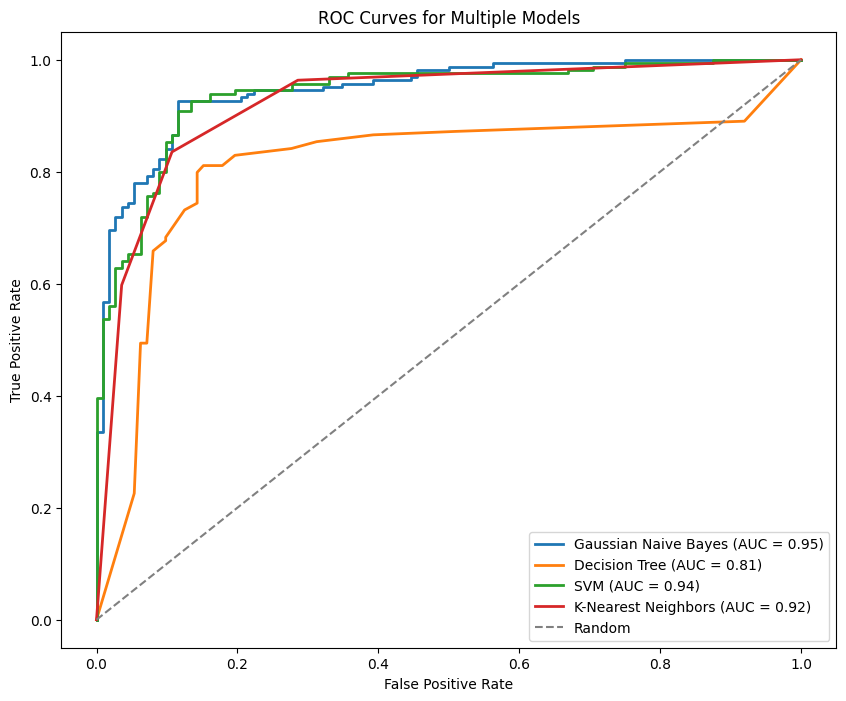

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    
    for model_name, model in models.items():
        if hasattr(model, "predict_proba"): # if that model have predict proba os attribut like naive bayes
            y_prob = model.predict_proba(X_test)[:, 1] #Returns [proba class0 , P(class1)] and select just for class1
        else:
            y_prob = model.decision_function(X_test) #Returns distances of the sample from the decision boundary (used for svm...etc)
        
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')#lw=2: Sets the line width to 2
    
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multiple Models')
    plt.legend(loc='lower right')
    plt.show()


models = {
    'Gaussian Naive Bayes': gnb,
    'Decision Tree': DT_model,
    'SVM':svm,
    'K-Nearest Neighbors' : knn
}

plot_roc_curves(models, X_test_scaled, y_test)


From this plot we see that the best model is naive bayes! because AUC =  0.95 

6. Which evaluation metric do you recommend for this dataset?


==> ROC Curve especially in balanced dataset.

7. Predict the class of the third sample from the testing set based on the best-performing model.

In [33]:
sample = X_test_scaled[2,:].reshape(1, -1)
prdicted_sample = gnb.predict(sample)
print(f"The predicted class of the third sample is: {prdicted_sample}")
print(f"The true value is: {y_test.iloc[2]}")

The predicted class of the third sample is: [1]
The true value is: 1


8. Perform the cross-validation evaluation method on the best model based on the selected metric.

In [34]:
from sklearn.model_selection import cross_val_score

best_model = gnb
scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy') 
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.2f}")
#so there is no overfetting

Cross-Validation Scores: [0.86413043 0.88586957 0.83695652 0.84153005 0.75956284]
Mean Accuracy: 0.84
